In [ ]:
np.size(behavior[:,1])

In [ ]:
import numpy as np 
import random
from scipy.stats import norm 
import matplotlib.pyplot as plt 
import sys 

###### Set initial conditions ###### 
N_steps = 225 
limit = 3 
N_sim = 2000
mothertypelist = [0,1]

behaviordata = np.zeros((2,N_sim,N_steps,4))


for mothertype in mothertypelist: #behavioral strategies mother, inactive if 0 
    for N in range (N_sim): 
        if mothertype == 0: 
            m_neg_emo_stop = 1 
            m_encourage_play = 0.35 #probability 
            m_encourage_initiative = 0 #probability 
            m_discourage_noplay = 0.8 
            m_inv_lowerbound = 0 # min higher than child 
            m_inv_upperbound = 0 # max higher than child 
            m_inv_abslowerbound = 0.05# max lower than mother initial 
            m_inv_absupperbound = 0.1 # max higher than mother initial 
            m_invpar = 0.65 
            m_1_sym_behavior = 0.50 
            m_0_sym_behavior = 0.1 
            m_rewardinv,m_rewardiso = [0.6,0.6]#small, high: [0.6,0.66] average, average: [0.81,0.54] 
        if mothertype == 1: 
            m_neg_emo_stop = 1 
            m_encourage_play = 0.10 #probability 
            m_encourage_initiative = 0 #probability 
            m_discourage_noplay = 0 
            m_inv_lowerbound = 0.01# min higher than child 
            m_inv_upperbound = 0.15 # max higher than child 
            m_inv_abslowerbound = 0.05# max lower than mother initial 
            m_inv_absupperbound = 0 # max higher than mother initial 
            m_invpar = 0.55 
            m_1_sym_behavior = 0.15 
            m_0_sym_behavior = 0.1 
            m_rewardinv,m_rewardiso = [0.75,0.6]#below average, above average 

        behavior = np.zeros((N_steps, 4)) 
        concern_real = np.zeros((N_steps,8)) 
        randomfactor = np.zeros((N_steps,4)) 
        c_invpar = 0.5 
        c_isopar = 1-c_invpar 
        c_sym_behavior, c_con_behavior, c_sym_emotion, c_con_emotion = [0.05,0.03,0.001,0.0025] 
        #c_sym_behavior, c_con_behavior, c_sym_emotion, c_con_emotion = [0.10,0.025,0.04,0.0025] 

        c_rewardinv,c_rewardiso = [0.81,0.54] 
        c_par1_pos,c_par2_pos,c_par3_pos,c_par4_pos = [0.05,0.45,0.8,0.05]#[0,0.4,0.75,0.05] 

        c_par1_neg,c_par2_neg,c_par3_neg,c_par4_neg = [0,0.4,0.2,-0.05] 
        c_meanpos, c_meanneg = [0.01,-0.01] 

        childpar = [[c_invpar,c_isopar],[c_sym_behavior,c_con_behavior],[c_sym_emotion,c_con_emotion],[c_rewardinv,c_rewardiso],[c_par1_pos,c_par2_pos],[c_par3_pos,c_par4_pos],[c_par1_neg,c_par2_neg],[c_par3_neg,c_par4_neg],[c_meanpos, c_meanneg]]

        c_1_con, c_1_sym, c_0_con, c_0_sym, m_1_con, m_1_sym, m_0_con, m_0_sym = [0,0,0,0,0,0,0,0] 

        if m_inv_abslowerbound >0: 
            m_inv_abslowerbound = m_invpar -m_inv_abslowerbound 
        if m_inv_absupperbound > 0: 
            m_inv_absupperbound = m_invpar +m_inv_absupperbound 

        m_isopar = 1-m_invpar 
        m_sym_behavior, m_con_behavior, m_sym_emotion, m_con_emotion = [0.10,0.025,0.04,0.0025] 
        #m_sym_behavior, m_con_behavior, m_sym_emotion, m_con_emotion = [0.05,0.03,0.001,0.0025]#[0.10,0.025,0.04,0.0025] 

        m_par1_pos,m_par2_pos,m_par3_pos,m_par4_pos = [0.1,0.5,0.6,0.05]#[0.05,0.45,0.6,0.05] 
        m_par1_neg,m_par2_neg,m_par3_neg,m_par4_neg = [0.0,0.4,0.2,-0.05] 
        m_meanpos, m_meanneg = [0.1,-0.1] 
        motherpar = [[m_invpar,m_isopar],[m_sym_behavior,m_con_behavior],[m_sym_emotion,m_con_emotion],[m_rewardinv,m_rewardiso],[m_par1_pos,m_par2_pos],[m_par3_pos,m_par4_pos],[m_par1_neg,m_par2_neg],[m_par3_neg,m_par4_neg],[m_meanpos, m_meanneg]] 

        weight_neutral = 0.5 
        weight_overreal = 0.5 
        random_ratio = 0.05 
        c_invvar = c_invpar 
        c_isovar = c_isopar 
        m_invvar = m_invpar 
        m_isovar = m_isopar 
        c_inv_real, c_iso_real, m_inv_real, m_iso_real = [0,0,0,0] 

        mem = N_steps 
        c_mem_inv = np.zeros(mem) 
        c_mem_iso = np.zeros(mem) 
        m_mem_inv = np.zeros(mem) 
        m_mem_iso = np.zeros(mem) 

        if c_invpar > c_isopar: 
            behavior[0,1] = 1 

        if c_invpar == c_isopar: 
            if random.random() > 0.5: 
                behavior[0,0] = 1 
            else: 
                behavior[0,0] = 0 

        if c_invpar < c_isopar: 
            behavior[0,0] = 0 
        if m_invpar > m_isopar: 
            behavior[0,1] = 1 
        if m_invpar == m_isopar: 
            if random.random() > 0.5: 
                behavior[0,1] = 0 
            else: 
                behavior[0,1] = 0 
        if m_invpar < m_isopar: 
            behavior[0,1] = 0 

        ###### Define functions/subroutines ###### 
        ##concern realization## 

        def calc_concern_real(): ## checked 
            global i, mem, c_mem_inv, c_mem_iso, m_mem_inv,m_mem_iso, behavior, c_rewardinv, c_rewardiso, m_rewardinv, m_rewardiso 
            if i <= mem: 
                deler = i+1 
                plaats = i 
            else: 
                deler = mem 

            if behavior[i,0] == 1 and behavior[i,1] == 1: 
                c_mem_inv[plaats] = c_rewardinv 
                m_mem_inv[plaats] = m_rewardinv 
            if behavior[i,0] == 1 and behavior[i,1] == 0: 
                    m_mem_iso[plaats] = m_rewardiso*.5 
            if behavior[i,0] == 0 and behavior[i,1] == 1: 
                    c_mem_iso[plaats] = c_rewardiso*.5 
            if behavior[i,0] == 0 and behavior[i,1] == 0: 
                    c_mem_iso[plaats] = c_rewardiso 
                    m_mem_iso[plaats] = m_rewardiso 
            c_inv_real = np.sum(c_mem_inv) 
            m_inv_real = np.sum(m_mem_inv) 
            c_iso_real = np.sum(c_mem_iso) 
            m_iso_real = np.sum(m_mem_iso) 
            c_inv_real_ratio = c_inv_real/deler 
            m_inv_real_ratio = m_inv_real/deler 
            c_iso_real_ratio = c_iso_real/deler 
            m_iso_real_ratio = m_iso_real/deler 

            #print c_inv_real_ratio, m_inv_real_ratio,c_iso_real_ratio,m_iso_real_ratio 
            return c_inv_real_ratio,c_iso_real_ratio,m_inv_real_ratio,m_iso_real_ratio 


        ##appraisal## 
        def calc_emotion(): ## checked 
            global c_inv_drive,c_iso_drive,m_inv_drive,m_iso_drive 
            W = weight_overreal 

            if c_inv_drive <0: 
                c_weight_inv = W 
            else: 
                c_weight_inv = 1 

            if c_iso_drive <0: 
                c_weight_iso = W 
            else: 
                c_weight_iso = 1
                
            if m_inv_drive <0: 
                m_weight_inv = W 
            else: 
                m_weight_inv = 1 
            
            if m_iso_drive <0: 
                m_weight_iso = W 
            else: 
                m_weight_iso = 1 
            #print "drive", c_inv_drive, c_iso_drive, m_inv_drive, m_iso_drive 

            c_emo = (abs(c_inv_drive)*c_weight_inv+abs(c_iso_drive)*c_weight_iso)/(c_weight_inv + c_weight_iso) 

            m_emo = (abs(m_inv_drive)*m_weight_inv+abs(m_iso_drive)*m_weight_iso)/(m_weight_inv + m_weight_iso) 

            c_emo = c_emo*-2+1 
            m_emo = m_emo*-2+1 

            return c_emo, m_emo 

        def calc_pref_conc(): ## checked 
            
            global c_invvar,c_isovar,m_invvar,m_isovar 
            if c_invvar < 0: 
                c_invvar = 0 
            if c_isovar < 0: 
                c_isovar = 0 
            if m_invvar < 0: 
                m_invvar = 0 
            if m_isovar < 0: 
                m_isovar = 0 
            if c_invvar == 0 and c_isovar == 0: 
                c_inv_pref = 0 
                c_iso_pref = 0 
            else: 
                c_inv_pref = c_invvar/(c_invvar + c_isovar) 
                c_iso_pref = c_isovar/(c_invvar + c_isovar) 
            if m_invvar == 0 and m_isovar == 0: 
                m_inv_pref = 0 
                m_iso_pref = 0 
            else: 
                m_inv_pref = m_invvar/(m_invvar + m_isovar) 
                m_iso_pref = m_isovar/(m_invvar + m_isovar) 
            return c_inv_pref, c_iso_pref, m_inv_pref, m_iso_pref 
            ##symmetry-continuity## 
            ##symmetry-continuity##
        
        def calc_sym_con(): ## checked
            global behavior,c_con_behavior,c_sym_behavior,m_con_behavior,m_sym_behavior,c_1_weight,c_0_weight,m_1_weight,m_0_weight
            global c_1_con, c_1_sym, c_0_con, c_0_sym, m_1_con, m_1_sym, m_0_con, m_0_sym

            if behavior[i-1,0] == 1 and behavior[i-1,1] == 1:
                c_1_con = c_con_behavior
                m_1_sym = m_1_sym_behavior
                c_1_sym = c_sym_behavior
                m_1_con = m_con_behavior
                c_0_con = 0
                m_0_sym = 0
                c_0_sym = 0
                m_0_con = 0
            
            if behavior[i-1,0] == 0 and behavior[i-1,1] == 1:
                c_1_con = 0
                m_1_sym = 0
                c_1_sym = c_sym_behavior
                m_1_con = m_con_behavior
                c_0_con = c_con_behavior
                m_0_sym = m_0_sym_behavior
                c_0_sym = 0
                m_0_con = 0
            
            if behavior[i-1,0] == 1 and behavior[i-1,1] == 0:
                c_1_con = c_con_behavior
                m_1_sym = m_1_sym_behavior
                c_1_sym = 0
                m_1_con = 0
                c_0_con = 0
                m_0_sym = 0
                c_0_sym = c_sym_behavior
                m_0_con = m_con_behavior
            
            if behavior[i-1,0] == 0 and behavior[i-1,1] == 0:
                c_1_con = 0
                m_1_sym = 0
                c_1_sym = 0
                m_1_con = 0
                c_0_con = c_con_behavior
                m_0_sym = m_0_sym_behavior
                c_0_sym = c_sym_behavior
                m_0_con = m_con_behavior
            c_1_weight = c_1_weight + c_1_con + c_1_sym
            m_1_weight = m_1_weight + m_1_con + m_1_sym
            c_0_weight = c_0_weight + c_0_con + c_0_sym
            m_0_weight = m_0_weight + m_0_con + m_0_sym
            return c_1_weight, c_0_weight,m_1_weight, m_0_weight

        ##random##
        def calc_random(): ## checked
            global randomfactor, random_ratio, random_1_c_mean, random_0_c_mean,random_1_m_mean, random_0_m_mean
            
            out = 1
            if random_ratio == 0:
                randomfactor[i,:] = [0,0,0,0]
            else:
                rate1 = norm.ppf(random.random(), 0, random_ratio)
                rate2 = norm.ppf(random.random(), 0, random_ratio)
                random_1_c_mean = random_1_c_mean*(1+rate1*(1-random_1_c_mean))
                random_1_c = random_1_c_mean + norm.ppf(random.random(), 0, random_ratio)*out-0.5
                random_0_c_mean = random_0_c_mean*(1+rate2*(1-random_0_c_mean))
                random_0_c = random_0_c_mean + norm.ppf(random.random(), 0, random_ratio)*out-0.5
                rate3 = norm.ppf(random.random(), 0, random_ratio)
                rate4 = norm.ppf(random.random(), 0, random_ratio)
                random_1_m_mean = random_1_m_mean*(1+rate3*(1-random_1_m_mean))
                random_1_m = random_1_m_mean + norm.ppf(random.random(), 0, random_ratio)*out-0.5
                random_0_m_mean = random_0_m_mean*(1+rate4*(1-random_0_m_mean))
                random_0_m = random_0_m_mean + norm.ppf(random.random(), 0, random_ratio)*out-0.5

                randomfactor[i,:] = [random_1_c,random_0_c,random_1_m,random_0_m]

        ##emotional expression##
        def calc_emotion_expr():
            global behavior,concern_real,c_emo,c_par1_pos,c_par2_pos,c_par3_pos,c_par4_pos,m_emo,m_par1_neg,m_par2_neg,m_par3_neg,m_par4_neg,weight_neutral,c_emo_dur_pos,c_emo_dur_neg,m_emo_dur_pos,m_emo_dur_neg, c_con_emotion, m_con_emotion, c_sym_emotion, m_sym_emotion
            global c_emo_expr, m_emo_expr

            expr_weight = np.zeros((3,2)) # positive, neutral, negative for c and m
            random_ratio_emotion = 1

            expr_weight[0,0] = my_sigmoid(c_emo,c_par1_pos,c_par2_pos,c_par3_pos,c_par4_pos)
            expr_weight[2,0] = my_sigmoid(c_emo,c_par1_neg,c_par2_neg,c_par3_neg,c_par4_neg)

            if expr_weight[0,0] >= expr_weight[2,0]:
                max_weight_pos_neg = expr_weight[0,0]
            else:
                max_weight_pos_neg = expr_weight[2,0]

            expr_weight[1,0] = weight_neutral - max_weight_pos_neg
            #print max_weight_pos_neg

            expr_weight[0,1] = my_sigmoid(m_emo,m_par1_pos,m_par2_pos,m_par3_pos,m_par4_pos)
            expr_weight[2,1] = my_sigmoid(m_emo,m_par1_neg,m_par2_neg,m_par3_neg,m_par4_neg)

            if expr_weight[0,1] >= expr_weight[2,1]:
                max_weight_pos_neg = expr_weight[0,1]
            else:
                max_weight_pos_neg = expr_weight[2,1]

            expr_weight[1,1] = weight_neutral - max_weight_pos_neg
            for c1 in range(3):
                for c2 in range(2):
                    t = expr_weight[c1,c2]
                    expr_weight[c1,c2] = t-t*random_ratio_emotion+t*random_ratio_emotion*random.random()
            
            if behavior[i-1,2] == 1:
                expr_weight[0,0] += c_con_emotion
                expr_weight[0,1] += m_sym_emotion
            if behavior[i-1,3] == 1:
                expr_weight[0,1] += m_con_emotion
                expr_weight[0,0] += c_sym_emotion
            if behavior[i-1,2] == 0:
                expr_weight[1,0] += c_con_emotion
                expr_weight[1,1] += m_sym_emotion
            if behavior[i-1,3] == 0:
                expr_weight[1,1] += m_con_emotion
                expr_weight[1,0] += c_sym_emotion
            if behavior[i-1,2] == -1:
                expr_weight[2,0] += c_con_emotion
                expr_weight[2,1] += m_sym_emotion
            if behavior[i-1,3] == -1:
                expr_weight[2,1] += m_con_emotion
                expr_weight[2,0] += c_sym_emotion
            emotion_prop_pos_c = expr_weight[0,0]/(expr_weight[1,0]+expr_weight[2,0])
            emotion_prop_neutral_c = (expr_weight[0,0] + expr_weight[2,0])/expr_weight[1,0]
            emotion_prop_neg_c = expr_weight[2,0]/(expr_weight[0,0]+expr_weight[1,0])
            emotion_prop_pos_m = expr_weight[0,1]/(expr_weight[1,1]+expr_weight[2,1])
            emotion_prop_neutral_m = (expr_weight[0,1] + expr_weight[2,1])/expr_weight[1,1]
            emotion_prop_neg_m = expr_weight[2,1]/(expr_weight[0,1]+expr_weight[1,1])

            #child
            if expr_weight[0,0] > expr_weight[1,0] and expr_weight[0,0] > expr_weight[2,0]:
                max_weight_pos_neg = expr_weight[0,0]
                T = 0
            else:
                if expr_weight[1,0] > expr_weight[2,0]:
                    max_weight_pos_neg = expr_weight[1,0]
                    T = 1
                else:
                    max_weight_pos_neg = expr_weight[2,0]
                    T = 2
            if c_emo_dur_pos > 0:
                c_emo_expr = 1
                c_emo_dur_pos += -1
                concern_real[i,0] = concern_real[i-1,0]
            if c_emo_dur_neg > 0:
                c_emo_expr = -1
                c_emo_dur_neg += -1
                concern_real[i,0] = concern_real[i-1,0]
            if c_emo_dur_neg == c_emo_dur_pos == 0:
                if T == 0:
                    c_emo_expr = 1
                if T == 1:
                    c_emo_expr = 0
                if T == 2:
                    c_emo_expr = -1
            if T == 0:
                c_emo_dur_pos = int(emotion_prop_pos_c)
                if c_emo_dur_pos < 2.875:
                    concern_real[i,0] = 2
                if c_emo_dur_pos < 5.25:
                    concern_real[i,0] = 3
                if c_emo_dur_pos < 7.625:
                    concern_real[i,0] = 4
                if c_emo_dur_pos > 7.625:
                    concern_real[i,0] = 5
            if T == 1:
                if emotion_prop_neutral_c < 0.44:
                    concern_real[i,0] = 0
                else:
                    if expr_weight[2,0] < expr_weight[0,0]:
                        concern_real[i,0] = 1
                    if expr_weight[2,0] > expr_weight[0,0]:
                        concern_real[i,0]= -1
            if T == 2:
                c_emo_dur_neg = int(emotion_prop_neg_c)
                if c_emo_dur_neg < 2.8:
                    concern_real[i,0] = -2
                if c_emo_dur_neg < 5.1:
                    concern_real[i,0] = -3
                if c_emo_dur_neg > 5.1:
                    concern_real[i,0] = -4
            #mother
            if expr_weight[0,1] > expr_weight[1,1] and expr_weight[0,1] > expr_weight[2,1]:
                max_weight_pos_neg = expr_weight[0,1]
                T = 0
            else:
                if expr_weight[1,1] > expr_weight[2,1]:
                    max_weight_pos_neg = expr_weight[1,1]
                    T = 1
                else:
                    max_weight_pos_neg = expr_weight[2,1]
                    T = 2
            if m_emo_dur_pos > 0:
                m_emo_expr = 1
                m_emo_dur_pos += -1
                concern_real[i,1] = concern_real[i-1,1]
            if m_emo_dur_neg > 0:
                if m_neg_emo_stop == 1:
                    m_emo_expr = 0
                else:
                    m_emo_expr = -1
                m_emo_dur_neg += -1
                concern_real[i,1] = concern_real[i-1,1]
            
            if m_emo_dur_neg == m_emo_dur_pos == 0:
                if T == 0:
                    m_emo_expr = 1
                if T == 1:
                    m_emo_expr = 0
                if T == 2:
                    if m_neg_emo_stop == 1:
                        m_emo_expr = 0
                    else:
                        m_emo_expr = -1
            if T == 0:
                m_emo_dur_pos = int(emotion_prop_pos_c)
                if m_emo_dur_pos < 2.875:
                    concern_real[i,1] = 2
                if m_emo_dur_pos < 5.25:
                    concern_real[i,1] = 3
                if m_emo_dur_pos < 7.625:
                    concern_real[i,1] = 4
                if m_emo_dur_pos > 7.625:
                    concern_real[i,1] = 5
            if T == 1:
                if emotion_prop_neutral_c < 0.44:
                    concern_real[i,1] = 0
                else:
                    if expr_weight[2,1] < expr_weight[0,1]:
                        concern_real[i,1] = 1
                    if expr_weight[2,1] > expr_weight[0,1]:
                        concern_real[i,1] = -1
            if T == 2:
                m_emo_dur_neg = int(emotion_prop_neg_c)
                if m_emo_dur_neg < 2.8:
                    concern_real[i,1] = -2
                if m_emo_dur_neg < 5.1:
                    concern_real[i,1] = -3
                if m_emo_dur_neg > 5.1:
                    concern_real[i,1] = -4

            return c_emo_expr, m_emo_expr, c_emo_dur_pos, c_emo_dur_neg, m_emo_dur_pos, m_emo_dur_neg

        ##sigmoid##
        def my_sigmoid(X, A, B, C, D): ## checked
            Y = A + B/(1+np.exp((C-X)/D))
            #print "para", A,B,C,D
            #print "variables", X,Y
            return Y

        ##concern##
        def calc_inv_iso_var(): ## checked
            global c_meanpos,c_meanneg,m_meanpos,m_meanneg, c_emo_expr, m_emo_expr, c_invvar, c_isovar, m_invvar, m_isovar, limit
            ratepos_c = c_meanpos
            rateneg_c = c_meanneg
            ratepos_m = m_meanpos
            rateneg_m = m_meanneg
            c = behavior[i,0]
            m = behavior[i,1]
            if c == 1 and c_emo_expr == 1:
                c_invvar = c_invvar*(1+ratepos_c*(1-(c_invvar/limit)))
                m_invvar = m_invvar*(1+ratepos_m*(1-(m_invvar/limit)))
            if m == 1 and m_emo_expr == 1:
                c_invvar = c_invvar*(1+ratepos_c*(1-(c_invvar/limit)))
                m_invvar = m_invvar*(1+ratepos_m*(1-(m_invvar/limit)))
            if c == 1 and c_emo_expr == -1:
                c_invvar = c_invvar*(1+rateneg_c*(1-(c_invvar/limit)))
                m_invvar = m_invvar*(1+rateneg_m*(1-(m_invvar/limit)))
            if m == 1 and m_emo_expr == -1:
                c_invvar = c_invvar*(1+rateneg_c*(1-(c_invvar/limit)))
                m_invvar = m_invvar*(1+rateneg_m*(1-(m_invvar/limit)))
            if c == 0 and c_emo_expr == 1:
                c_isovar = c_isovar*(1+ratepos_c*(1-(c_isovar/limit)))
                m_isovar = m_isovar*(1+ratepos_m*(1-(m_isovar/limit)))
            if m == 0 and m_emo_expr == 1:
                c_isovar = c_isovar*(1+ratepos_c*(1-(c_isovar/limit)))
                m_isovar = m_isovar*(1+ratepos_m*(1-(m_isovar/limit)))
            if c == 0 and c_emo_expr == -1:
                c_isovar = c_isovar*(1+rateneg_c*(1-(c_isovar/limit)))
                m_isovar = m_isovar*(1+rateneg_m*(1-(m_isovar/limit)))
            if m == 0 and m_emo_expr == -1:
                c_isovar = c_isovar*(1+rateneg_c*(1-(c_isovar/limit)))
                m_isovar = m_isovar*(1+rateneg_m*(1-(m_isovar/limit)))
            #print c_invvar, c_isovar, m_invvar, m_isovar
            return c_invvar, c_isovar, m_invvar, m_isovar
        ###### More initial conditions ######
        i = 0
        plaats = 0
        c_inv_real_ratio,c_iso_real_ratio,m_inv_real_ratio,m_iso_real_ratio = calc_concern_real()
        #initial drives
        c_inv_drive = c_invvar - c_inv_real_ratio
        c_iso_drive = c_isovar - c_iso_real_ratio
        m_inv_drive = m_invvar - m_inv_real_ratio
        m_iso_drive = m_isovar - m_iso_real_ratio
        c_emo, m_emo = calc_emotion()
        concern_real[0,4:8] = c_invvar,c_isovar,m_invvar,m_isovar
        concern_real[0,2:4] = c_emo, m_emo
        behavior[0,2:4] = [0,0]
        if random_ratio > 0:
            random_1_c_mean, random_0_c_mean, random_1_m_mean, random_0_m_mean = [0.5,0.5,0.5,0.5]

        c_emo_dur_pos, c_emo_dur_neg, m_emo_dur_pos, m_emo_dur_neg = [0,0,0,0]

        ###### Start simulation ######
        sim = np.array(range(N_steps-1)) + 1
        for i in sim:
            c_inv_pref, c_iso_pref, m_inv_pref, m_iso_pref = calc_pref_conc()
            c_1_weight = c_inv_drive
            c_0_weight = c_iso_drive
            m_1_weight = m_inv_drive
            m_0_weight = m_iso_drive
            c_1_weight, c_0_weight,m_1_weight, m_0_weight = calc_sym_con()
            calc_random() #random_ratio, random_1_c_mean, random_0_c_mean,random_1_m_mean, random_0_m_mean)
            c_1_weight += randomfactor[i,0]
            c_0_weight += randomfactor[i,1]
            m_1_weight += randomfactor[i,2]
            m_0_weight += randomfactor[i,3]

            if c_1_weight > c_0_weight:
                behavior[i,0] = 1
            else:
                behavior[i,0] = 0
            if m_1_weight > m_0_weight:
                behavior[i,1] = 1
            else:
                behavior[i,1] = 0

            c_inv_real_ratio,c_iso_real_ratio,m_inv_real_ratio,m_iso_real_ratio = calc_concern_real()

            c_inv_drive = c_inv_pref - c_inv_real_ratio
            c_iso_drive = c_iso_pref - c_iso_real_ratio
            m_inv_drive = m_inv_pref - m_inv_real_ratio
            m_iso_drive = m_iso_pref - m_iso_real_ratio
            c_emo, m_emo = calc_emotion()
            c_emo_expr, m_emo_expr, c_emo_dur_pos,c_emo_dur_neg,m_emo_dur_pos,m_emo_dur_neg = calc_emotion_expr()

            if m_encourage_play > 0:
                if behavior[i,0] == behavior[i,1] == 1:
                    if random.random() < m_encourage_play:
                        m_emo_expr = 1

            if m_encourage_initiative > 0:
                if behavior[i,0] == 1 and behavior[i,1] ==0:
                    if random.random() < m_encourage_initiative:
                        m_emo_expr = 1

            if m_discourage_noplay > 0:
                if behavior[i,0] == 0:
                    if random.random() < m_discourage_noplay:
                        m_emo_expr = 0
            behavior[i,2] = c_emo_expr
            behavior[i,3] = m_emo_expr

            c_invvar, c_isovar, m_invvar, m_isovar = calc_inv_iso_var()

            if m_inv_lowerbound >0:
                if m_invvar/(m_invvar+m_isovar) < c_invvar/(c_invvar+c_isovar)+m_inv_lowerbound:
                    m_invvar = c_invvar/(c_invvar+c_isovar) +m_inv_lowerbound
                    m_isovar = 1 - m_invvar

            if m_inv_upperbound >0:
                if m_invvar/(m_invvar+m_isovar) > c_invvar/(c_invvar+c_isovar)+m_inv_upperbound:
                    m_invvar = c_invvar/(c_invvar+c_isovar) +m_inv_upperbound
                    m_isovar = 1 - m_invvar

            if m_inv_abslowerbound >0:
                if m_invvar/(m_invvar+m_isovar) < m_inv_abslowerbound:
                    m_invvar = m_inv_abslowerbound
                    m_isovar = 1 - m_invvar

            if m_inv_absupperbound >0:
                if m_invvar/(m_invvar+m_isovar) > m_inv_absupperbound:
                    m_invvar = m_inv_absupperbound
                    m_isovar = 1 - m_invvar

            concern_real[i,2:4] = [c_emo, m_emo]
            concern_real[i,4] = c_invvar/(c_invvar+c_isovar)
            concern_real[i,5] = c_isovar/(c_invvar+c_isovar)
            concern_real[i,6] = m_invvar/(m_invvar+m_isovar)
            concern_real[i,7] = m_isovar/(m_invvar+m_isovar)
        
        behaviordata[mothertype,N,:,:] = behavior

In [4]:
N_sim = 2000
N_steps = 225
behaviorsum = np.zeros((2,N_sim,4))
playt = np.zeros((2,N_sim))
playa = np.zeros((2,N_sim))

attc = np.zeros((2,N_sim))
succ = np.zeros((2,N_sim))
attp = np.zeros((2,N_sim))
sucp = np.zeros((2,N_sim))


for i in range(N_sim):
    for t in range(N_steps):
        for k in range(2):
            if behaviordata[k,i,t,0]==1:
                if behaviordata[k,i,t,1] == 1:
                    playt[k,i] += 1
                    
                    if t>0:
                        tt = 1
                        while (t-tt-1 > 0):
                            if (behaviordata[k,i,t-tt,0] == 1) & (behaviordata[k,i,t-tt,1] == 0):
                                succ[k,i] += 1
                                tt = t
                            else:
                                if (behaviordata[k,i,t-tt,0] == 0) & (behaviordata[k,i,t-tt,1] == 1):
                                    sucp[k,i] += 1
                                    tt = t
                            tt += 1
                else:
                    attc[k,i] += 1
            else:
                if behaviordata[k,i,t,1] == 0:
                    playa[k,i] += 1
                else:
                    attp[k,i] += 1
                                

In [129]:
N_sim = 2000
N_steps = 225
behaviorsum = np.zeros((2,N_sim,4))
playt = np.zeros((2,N_sim))
playa = np.zeros((2,N_sim))

attc = np.zeros((2,N_sim))
succ = np.zeros((2,N_sim))
attp = np.zeros((2,N_sim))
sucp = np.zeros((2,N_sim))


for i in range(N_sim):
    for t in range(N_steps):
        for k in range(2):
            if behaviordata[k,i,t,0]==1:
                if behaviordata[k,i,t,1] == 1:
                    playt[k,i] += 1
                    
                    if t>0:
                        tt = 1
                        while (t-tt-1 > 0):
                            if (behaviordata[k,i,t-tt,0] == 1) & (behaviordata[k,i,t-tt,1] == 0):
                                succ[k,i] += 1
                                tt = t
                            else:
                                if (behaviordata[k,i,t-tt,0] == 0) & (behaviordata[k,i,t-tt,1] == 1):
                                    sucp[k,i] += 1
                                    tt = t
                            tt += 1
                else:
                    if (t>0) & (behaviordata[k,i,t-1,0] == 1) & (behaviordata[k,i,t-1,1] == 0):
                        attc[k,i] += 1
                    else: 
                        playa[k,i]+=1
            else:
                if behaviordata[k,i,t,1] == 0:
                    playa[k,i] += 1
                else:
                    if (t>0) & (behaviordata[k,i,t-1,0] == 0) & (behaviordata[k,i,t-1,1] == 1):
                        attp[k,i] += 1
                    else:
                        playa[k,i] += 1

2.4


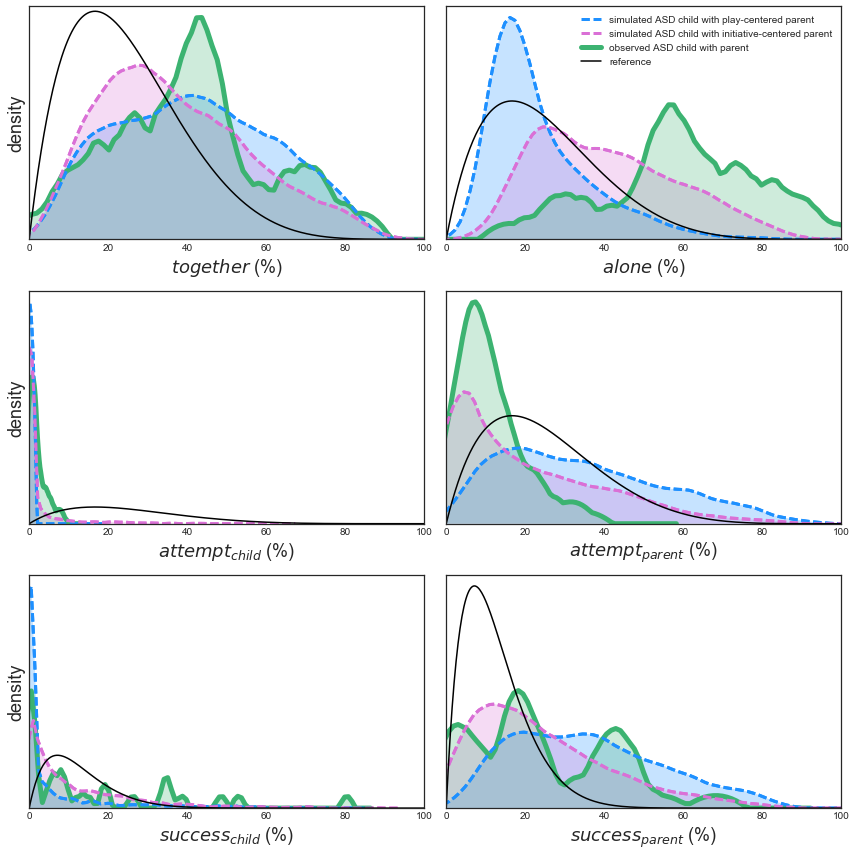

In [190]:
#np.size(playa[0,:])
import seaborn as sns
import matplotlib.pyplot as plt
refl = 1.5
kern = 'epa'
m1c = 'dodgerblue'
m2c = 'orchid'
oc = 'mediumseagreen'
BW = 8
BW2 = 2
BW3 = 8
obsdata =np.genfromtxt ('/Users/casperhesp/Documents/obsdata.csv', delimiter=";",skip_header =1) #playt,playa,attc,attp,succ,sucp
plt.figure(figsize=(12,12))
np.size(attc[0,:])
plt.subplot(3,2,1)
sns.kdeplot((playt[0,:]/2.25),shade= True, bw = BW, kernel = kern, linewidth= 3,linestyle ='--',color = m1c)
sns.distplot(playt[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m2c)
sns.distplot(obsdata[:,0], hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern,'shade': True, 'linewidth': 5},color = oc)
sns.kdeplot((playt[0,:]/2.25), bw = BW, kernel = kern, linewidth= 3,linestyle ='--',color = m1c)
sns.distplot(playt[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m2c)

plt.plot(100*np.linspace(0,1,401),sts.beta.pdf(np.linspace(0,1,401),2,6)/100.0,color = 'black',linewidth=refl)
plt.xlim([0,100])
plt.yticks([])
plt.xlabel(r'$together$ (%)',fontsize=18)
plt.ylabel('density', fontsize=18)


print np.amin(obsdata[:,0])

if 1:
    plt.subplot(3,2,2)
    sns.distplot(playa[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--','label':'simulated ASD child with play-centered parent'},color = m1c)
    sns.distplot(playa[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--','label':'simulated ASD child with initiative-centered parent'},color = m2c)
    sns.distplot(obsdata[:,1], hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern,'shade': True, 'linewidth': 5,'label':'observed ASD child with parent'},color = oc)
    sns.distplot(playa[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(playa[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m2c)
    plt.plot(100*np.linspace(0,1,401),sts.beta.pdf(np.linspace(0,1,401),2,6)/100.0,color = 'black',label = 'reference',linewidth=refl)
    plt.legend()
    plt.xlim([0,100])
    plt.yticks([])
    plt.xlabel(r'$alone$ (%)',fontsize=18)
    

    plt.subplot(3,2,3)
    sns.distplot(attc[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(attc[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m2c)
    sns.distplot(obsdata[:,2], hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern,'shade': True, 'linewidth': 5},color = oc,bins = [0,100])
    sns.distplot(attc[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(attc[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m2c)
    plt.ylabel('density', fontsize=18)
    plt.plot(100*np.linspace(0,1,401),sts.beta.pdf(np.linspace(0,1,401),2,6)/100.0,color = 'black',linewidth=refl)
    plt.xlim([0,100])
    plt.yticks([])
    plt.xlabel(r'$attempt_{child}$ (%)',fontsize=18)

    plt.subplot(3,2,4)
    sns.distplot(attp[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(attp[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m2c)
    sns.distplot(obsdata[:,3], hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern,'shade': True, 'linewidth': 5},color = oc)
    sns.distplot(attp[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(attp[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m2c)
    plt.plot(100*np.linspace(0,1,401),sts.beta.pdf(np.linspace(0,1,401),2,6)/100.0,color = 'black',linewidth=refl)
    plt.xlim([0,100])
    plt.yticks([])
    plt.xlabel(r'$attempt_{parent}$ (%)',fontsize=18)

    plt.subplot(3,2,5)
    sns.distplot(succ[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(succ[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m2c)
    sns.distplot(obsdata[:,4], hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern,'shade': True, 'linewidth': 5},color = oc)
    sns.distplot(succ[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(succ[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW2,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m2c)
    plt.plot(100*np.linspace(0,1,401),sts.beta.pdf(np.linspace(0,1,401),2,14)/100.0,color = 'black',linewidth=refl)
    plt.xlim([0,100])
    plt.yticks([])
    plt.xlabel(r'$success_{child}$ (%)',fontsize=18)
    plt.ylabel('density', fontsize=18)

    plt.subplot(3,2,6)
    sns.distplot(sucp[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(sucp[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern,'shade': True, 'linewidth': 3,'linestyle': '--'},color = m2c)
    sns.distplot(obsdata[:,5], hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern,'shade': True, 'linewidth': 5},color = oc)
    sns.distplot(sucp[0,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m1c)
    sns.distplot(sucp[1,:]/2.25, hist=False, kde=True,kde_kws = {'bw':BW3,'kernel': kern, 'linewidth': 3,'linestyle': '--'},color = m2c)
    plt.plot(100*np.linspace(0,1,401),sts.beta.pdf(np.linspace(0,1,401),2,14)/100.0,color = 'black',linewidth=refl)
    plt.xlim([0,100])
    plt.ylim([0,0.06])
    plt.yticks([])
    plt.xlabel(r'$success_{parent}$ (%)',fontsize=18)


#plt.hist(playt[0,:]/2.25, np.linspace(0,100,20),normed = True)
#plt.hist(playt[1,:]/2.25, np.linspace(0,100,20),normed = True)
#plt.hist(obsdata[:,0], np.linspace(0,100,20),normed = True)
plt.tight_layout()
plt.show()

In [191]:
import scipy.stats as sts

M1 = np.zeros(6)
M2 = np.zeros(6)
R = np.zeros(6)


Z = np.histogram(playt[0,:]/2.25,range=[-0.01,100],bins=40,density = True)
Y = np.histogram(playt[1,:]/2.25,range=[-0.01,100],bins=40,density = True)
X = np.histogram(obsdata[:,0],range=[-0.01,100],bins=40,density = True)

Z[0][Z[0]==0]=0.017
Y[0][Y[0]==0]=0.017
M1[0] = sts.entropy(X[0],Z[0])
M2[0] = sts.entropy(X[0],Y[0])
#R[0] = sts.entropy(X[0],np.zeros(20)+0.017)
R[0] = sts.entropy(X[0],sts.beta.cdf(np.linspace(0,1,41),2,6)[1:]-sts.beta.cdf(np.linspace(0,1,41),2,6)[:-1])

Z = np.histogram(playa[0,:]/2.25,range=[-0.01,100],bins=40,density = True)
Y = np.histogram(playa[1,:]/2.25,range=[-0.01,100],bins=40,density = True)
X = np.histogram(obsdata[:,1],range=[-0.01,100],bins=40,density = True)

Z[0][Z[0]==0]=0.017
Y[0][Y[0]==0]=0.017
M1[1] = sts.entropy(X[0],Z[0])
M2[1] = sts.entropy(X[0],Y[0])
#R[1] = sts.entropy(X[0],np.zeros(20)+0.017)
R[1] = sts.entropy(X[0],sts.beta.cdf(np.linspace(0,1,41),2,6)[1:]-sts.beta.cdf(np.linspace(0,1,41),2,6)[:-1])


Z = np.histogram(attc[0,:]/2.25,range=[-0.01,100],bins=40,density = True)
Y = np.histogram(attc[1,:]/2.25,range=[-0.01,100],bins=40,density = True)
X = np.histogram(obsdata[:,2],range=[-0.01,100],bins=40,density = True)

Z[0][Z[0]==0]=0.017
Y[0][Y[0]==0]=0.017
M1[2] = sts.entropy(X[0],Z[0])
M2[2] = sts.entropy(X[0],Y[0])
#R[2] = sts.entropy(X[0],np.zeros(np.shape(X[0]))+0.017)
R[2] = sts.entropy(X[0],sts.beta.cdf(np.linspace(0,1,41),2,6)[1:]-sts.beta.cdf(np.linspace(0,1,41),2,6)[:-1])


Z = np.histogram(attp[0,:]/2.25,range=[-0.01,100],bins=40,density = True)
Y = np.histogram(attp[1,:]/2.25,range=[-0.01,100],bins=40,density = True)
X = np.histogram(obsdata[:,3],range=[-0.01,100],bins=40,density = True)

Z[0][Z[0]==0]=0.017
Y[0][Y[0]==0]=0.017
M1[3] = sts.entropy(X[0],Z[0])
M2[3] = sts.entropy(X[0],Y[0])
#R[3] = sts.entropy(X[0],np.zeros(np.shape(X[0]))+0.017)
R[3] = sts.entropy(X[0],sts.beta.cdf(np.linspace(0,1,41),2,6)[1:]-sts.beta.cdf(np.linspace(0,1,41),2,6)[:-1])


Z[0][Z[0]==0]=0.017
Y[0][Y[0]==0]=0.017
Z = np.histogram(succ[0,:]/2.25,range=[-0.01,100],bins=40,density = True)
Y = np.histogram(succ[1,:]/2.25,range=[-0.01,100],bins=40,density = True)
X = np.histogram(obsdata[:,4],range=[-0.01,100],bins=40,density = True)

M1[4] = sts.entropy(X[0],Z[0])
M2[4] = sts.entropy(X[0],Y[0])
#R[4] = sts.entropy(X[0],np.zeros(np.shape(X[0]))+0.017)
R[4] = sts.entropy(X[0],sts.beta.cdf(np.linspace(0,1,41),2,14)[1:]-sts.beta.cdf(np.linspace(0,1,41),2,14)[:-1])

Z[0][Z[0]==0]=0.017
Y[0][Y[0]==0]=0.017
Z = np.histogram(sucp[0,:]/2.25,range=[-0.01,100],bins=40,density = True)
Y = np.histogram(sucp[1,:]/2.25,range=[-0.01,100],bins=40,density = True)
X = np.histogram(obsdata[:,5],range=[-0.01,100],bins=40,density = True)

M1[5] = sts.entropy(X[0],Z[0])
M2[5] = sts.entropy(X[0],Y[0])
#R[5] = sts.entropy(X[0],np.zeros(np.shape(X[0]))+0.017)
R[5] = sts.entropy(X[0],sts.beta.cdf(np.linspace(0,1,41),2,14)[1:]-sts.beta.cdf(np.linspace(0,1,41),2,14)[:-1])

print R-M1
print R-M2
print R

print np.sum(M1), np.sum (M2), np.sum(R-M1),np.sum(R-M2),np.sum(R)


[ 0.32118614  0.95798773  2.27908896 -0.44159954  0.95825396  0.48008446]
[ 0.40482472  1.85883015  2.52015603  0.16459159  1.10713577  1.01610431]
[ 1.08741609  3.08663788  3.32005831  0.85996133  1.82504732  1.65590696]
7.28002619295 4.76338532382 4.55500170707 7.07164257621 11.8350279


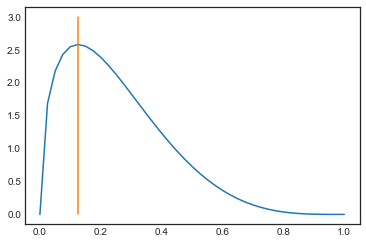

In [166]:
plt.plot(np.linspace(0,1,41),sts.beta.pdf(np.linspace(0,1,41),1.5,4.5))
plt.plot([0.125,0.125],[0,3])
plt.show()


In [1]:
#np.save('/Users/casperhesp/Downloads/secondsbehaviordata',behaviordata)
import numpy as np
behaviordata=np.load('/Users/casperhesp/Downloads/secondsbehaviordata.npy')



In [152]:
sts.beta.cdf(np.linspace(0,1,11),2,4)[1:]-sts.beta.cdf(np.linspace(0,1,11),2,4)[:-1]

array([ 0.08146,  0.18126,  0.20906,  0.19126,  0.14946,  0.10046,
        0.05626,  0.02406,  0.00626,  0.00046])

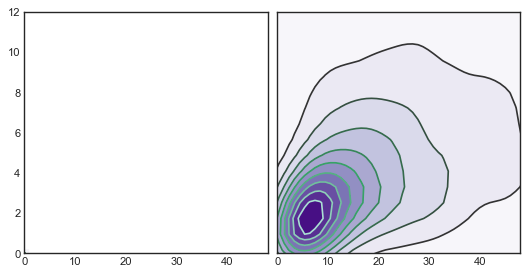

In [45]:
import seaborn as sns
 
plt.figure(figsize=(8, 4), dpi=80)
# Basic 2D density plot

sns.set_style("white")
plt.subplot(1,2,1)
sns.kdeplot(playa[0,:]/225.0,attc[0,:]/225.0, shade = True, cmap="Purples")#, cbar = True)#, shade_lowest=True,)
sns.kdeplot(playa[0,:]/225.0,attc[0,:]/225.0)#, cbar = True)#, shade_lowest=True,)

#sns.plt.show()
plt.ylim([0,12])
plt.xlim([0,48])

plt.subplot(1,2,2)
sns.kdeplot(playa[1,:]/2.250,attc[1,:]/2.250, shade = True, cmap="Purples")#,cbar = True,cut=2)#, shade_lowest=True,)
sns.kdeplot(playa[1,:]/2.250,attc[1,:]/2.250)#, shade_lowest=True,)

# Custom it with the same argument as 1D density plot
#sns.kdeplot(playa[0,:],attc[0,:], cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
#sns.kdeplot(playa[0,:],attc[0,:], cmap="Blues", shade=True, shade_lowest=True, )
plt.yticks([])
plt.ylim([0,12])
plt.xlim([0,48])
plt.subplots_adjust(wspace=0.04)
plt.show()


In [ ]:
np.size(playa)
np.size(succ)

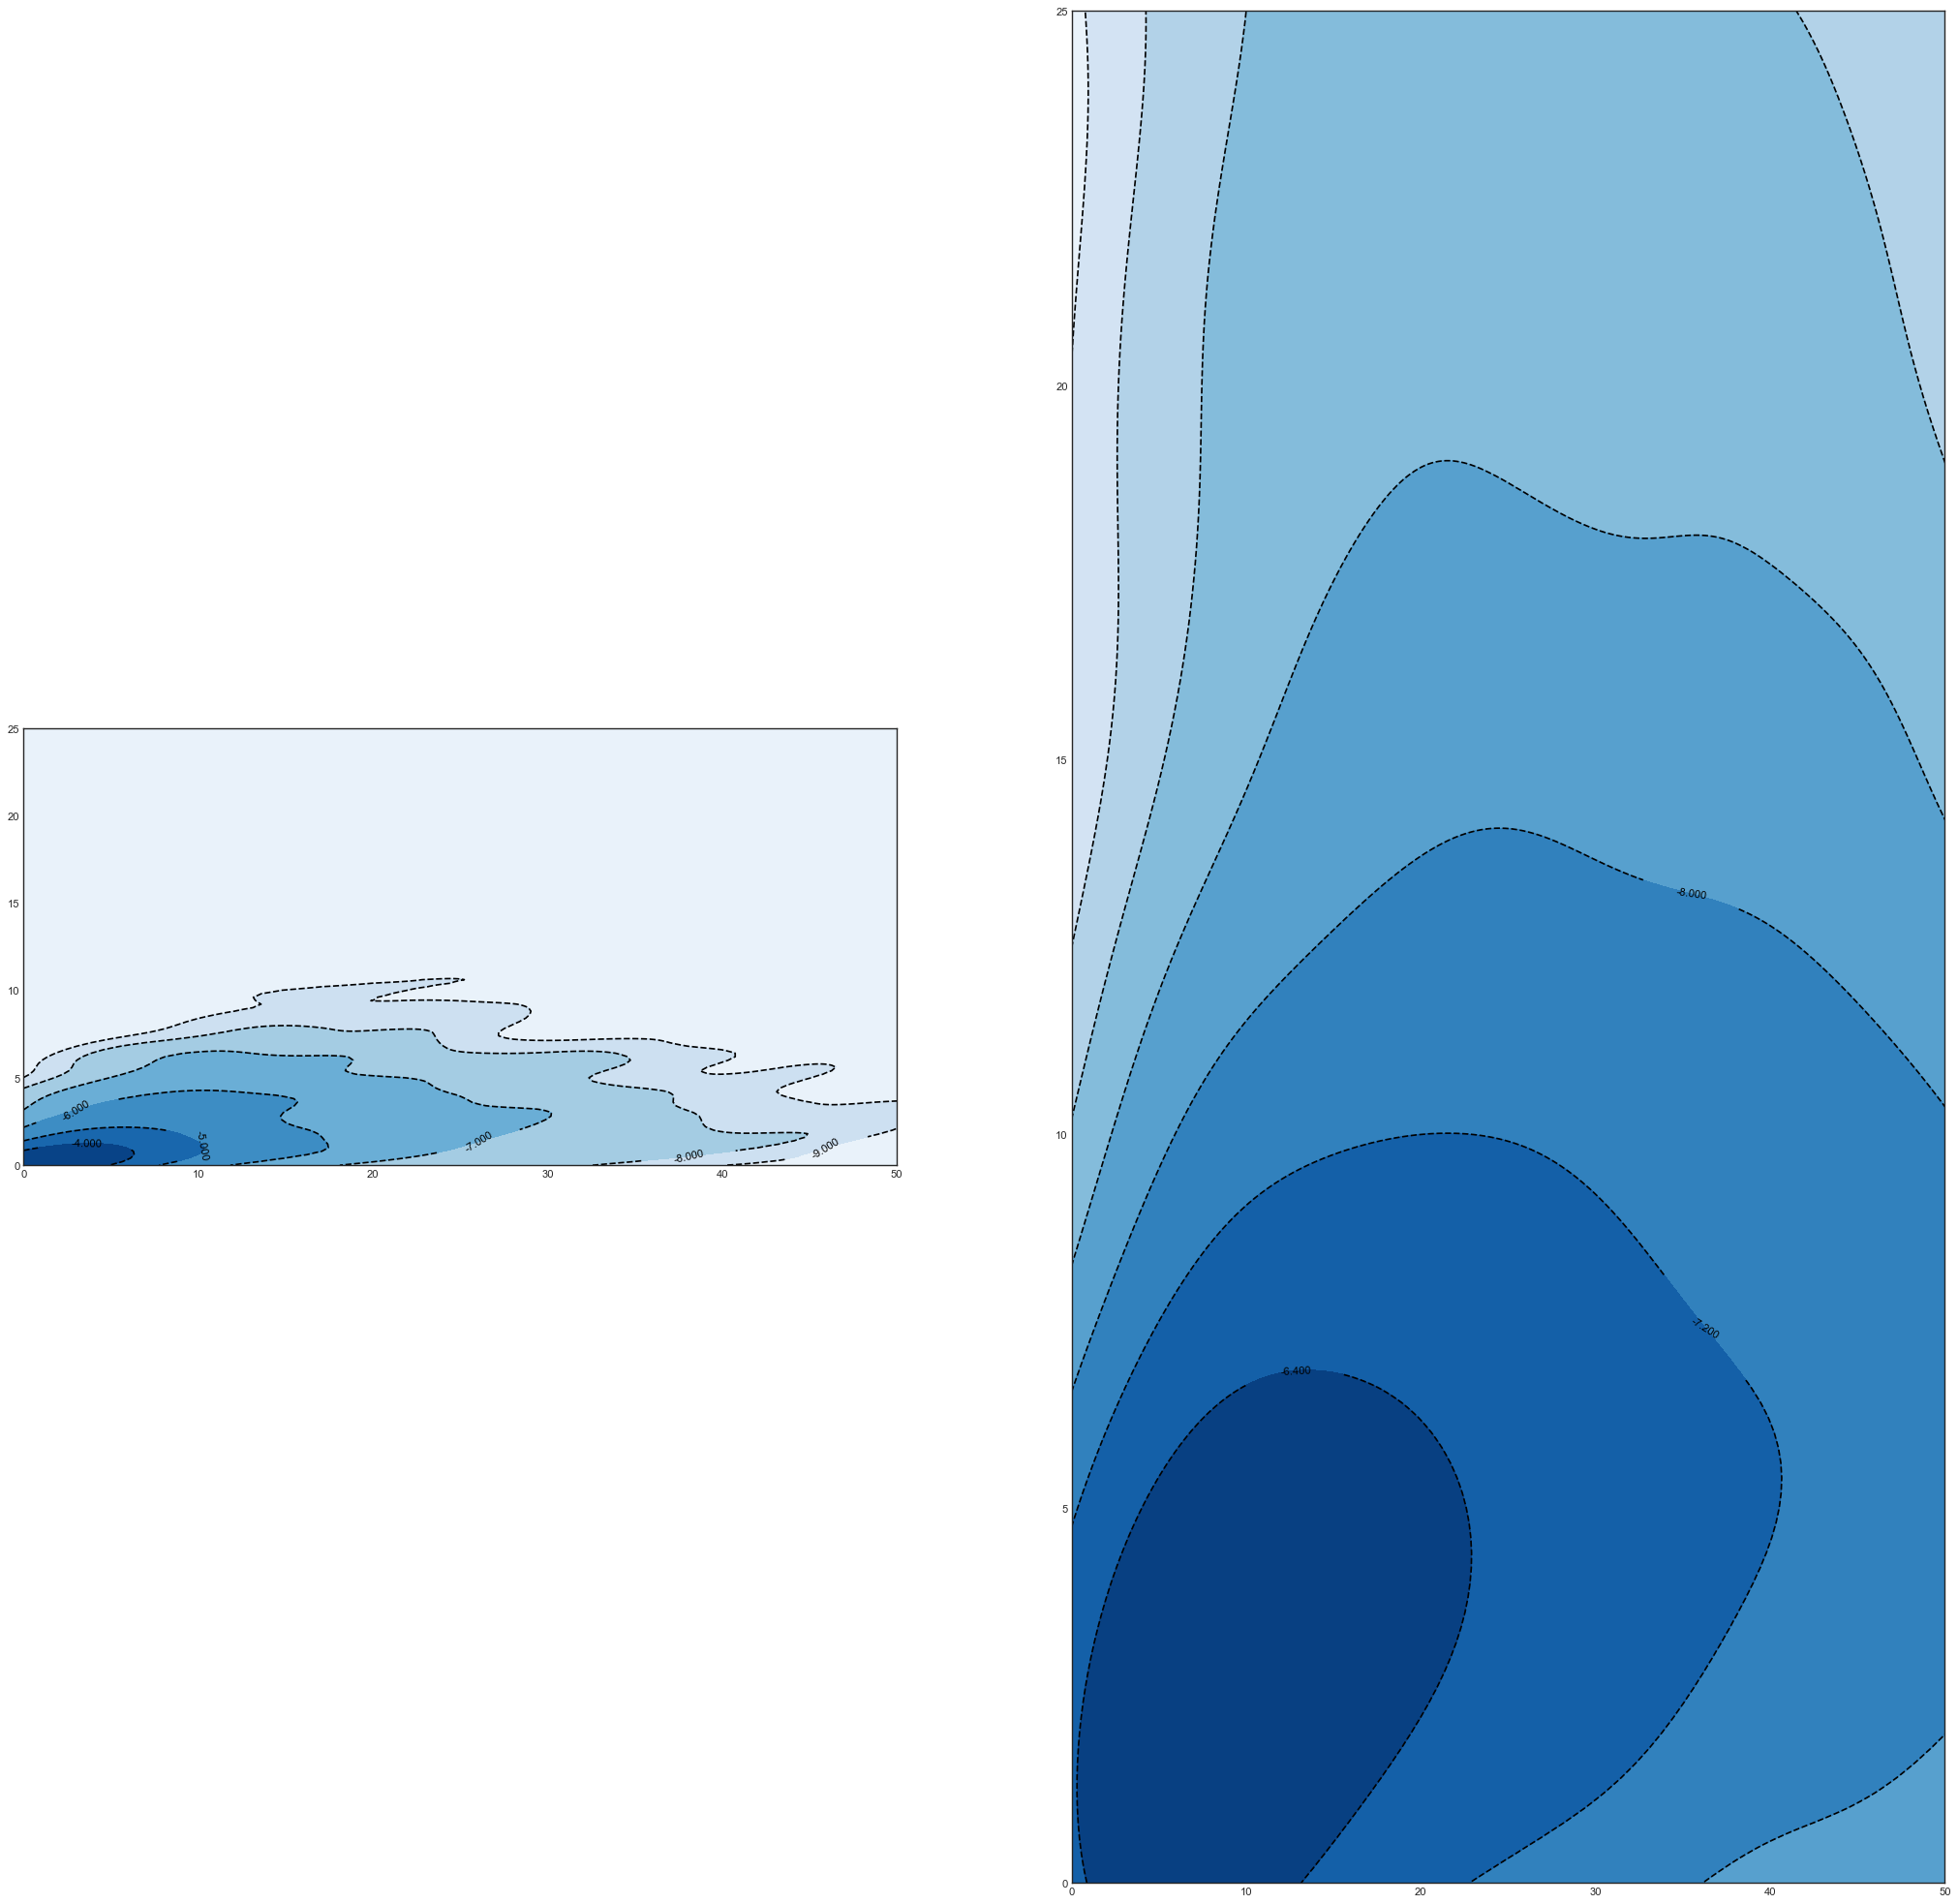

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x1 = playa[0,:]/2.250
y1 = 100*attc[0,:]/(225-playa[0,:])

x2 = playa[1,:]/2.250
y2 = 100*attc[1,:]/(225-playa[1,:])

xmin, xmax = 0,100
ymin, ymax = 0,100

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values1 = np.vstack([x1, y1])
kernel1 = st.gaussian_kde(values1)
f1 = np.reshape(kernel1(positions).T, xx.shape)

values2 = np.vstack([x2, y2])
kernel2 = st.gaussian_kde(values2)
f2 = np.reshape(kernel2(positions).T, xx.shape)


fig = plt.figure(figsize=(32,32),dpi=80)
plt.subplot(1,2,1)
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
# Contourf plot
cfset1 = ax1.contourf(xx, yy, np.log(f1n), cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
ax1.imshow(np.rot90(np.log(f1+0.001)), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset1 = ax1.contour(xx, yy, np.log(f1n), colors='k')
# Label plot
ax1.clabel(cset1, inline=1, fontsize=10)
plt.xlim([0,50])
plt.ylim([0,25])

plt.subplot(1,2,2)
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
# Contourf plot
cfset2 = ax2.contourf(xx, yy, np.log(f2n), cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot

#ax2.imshow(np.rot90(np.log(f2+0.001)), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

# Contour plot
cset2 = ax2.contour(xx, yy, np.log(f2n), colors='k')
# Label plot
ax2.clabel(cset2, inline=1, fontsize=10)
plt.xlim([0,50])
plt.ylim([0,25])

plt.show()

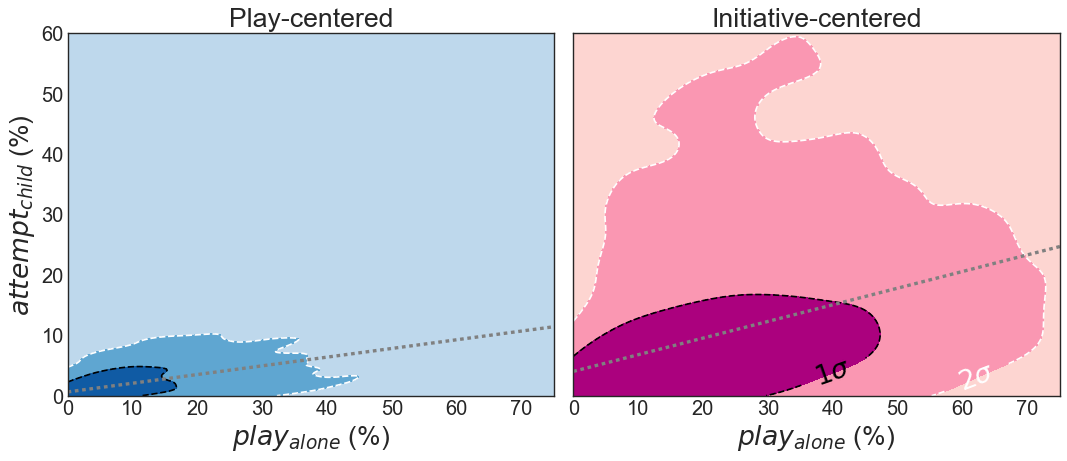

0.366923099076
0.13000214414


In [123]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


fmt = {}
strs = [r'$68%$',r'$95%$']

model1 = LinearRegression(fit_intercept=True)
model1.fit(x1[:, np.newaxis], y1)

xfit = np.linspace(0, 88, 50)
y1fit = model1.predict(xfit[:, np.newaxis])

model2 = LinearRegression(fit_intercept=True)
model2.fit(x2[:, np.newaxis], y2)

y2fit = model2.predict(xfit[:, np.newaxis])


fig = plt.figure(figsize=(16,6),dpi=80)
plt.subplot(1,2,1)
plt.ylabel(r'$attempt_{child}$ (%)',fontsize=24)
plt.yticks(fontsize=18)
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
# Contourf plot
cfset1 = ax1.contourf(xx, yy, np.log(f1n),levels=s1, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax1.imshow(np.rot90(np.log(f1+0.001)), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
#cset1 = ax1.contour(xx, yy, np.log(f1n),levels = s2)

cset1 = ax1.contour(xx, yy, np.log(f1n),levels = [s1[2],s1[3]], colors=['white','black'],linestyles='dashed')

#cset1 = ax1.contour(xx, yy, np.log(f1n),levels = [s1[1],s1[2],s1[3],s1[4],s1[5]], colors=['blue','white','cyan','black','red'])

for l, s in zip(cset1.levels, strs):
    fmt[l] = s
plt.plot(xfit, y1fit, color='gray',linestyle=':',linewidth = 3)
#ax1.clabel(cset1,inline=1, fmt=fmt,fontsize=30,colors=['white','black'])

# Label plot
#ax1.clabel(cset, inline=1, fontsize=10)
plt.xlim([0,75])
plt.ylim([0,60])
plt.title("Play-centered",fontsize = 24)
plt.xlabel(r'$play_{alone}$ (%)',fontsize=24)
plt.xticks(fontsize=18)

plt.subplot(1,2,2)
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
# Contourf plot
cfset2 = ax2.contourf(xx, yy, np.log(f2n),levels=s2, cmap='RdPu')
## Or kernel density estimate plot instead of the contourf plot

#ax2.imshow(np.rot90(np.log(f2+0.001)), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

# Contour plot

#cset2 = ax2.contour(xx, yy, np.log(f2n),levels = s2)

cset2 = ax2.contour(xx, yy, np.log(f2n),levels = [s2[2],s2[3]], colors=['white','black'],linestyles='dashed')

#cset2 = ax2.contour(xx, yy, np.log(f2n),levels = [s2[1],s2[2],s2[3],s2[4],s2[5]], colors=['blue','white','cyan','black','red'])
# Label plot

fmt = {}
strs = [r'$2\sigma$',r'$1\sigma$']
for l, s in zip(cset2.levels, strs):
    fmt[l] = s

ax2.clabel(cset2,inline=1, fmt=fmt,fontsize=24,colors=['white','black'])
plt.title("Initiative-centered",fontsize = 24)
plt.plot(xfit, y2fit, color='gray',linestyle=':',linewidth = 3)

plt.xlim([0,75])
plt.ylim([0,60])

plt.yticks([])
plt.xlabel(r'$play_{alone}$ (%)',fontsize=24)
plt.xticks(fontsize=18)
plt.subplots_adjust(wspace=0.04)
plt.show()

print model1.score(x1[:, np.newaxis],y1)
print model2.score(x2[:, np.newaxis],y2)

In [113]:
obsdata =np.genfromtxt ('/Users/casperhesp/Documents/obsdata.csv', delimiter=";",skip_header =1) #playt,playa,attc,attp,succ,sucp
import scipy.stats as sts
obsdata[:,0]
#playt[0,:]/2.25

pvalues = np.zeros((2,6))

FF = False

pvalues[0,0] = sts.mannwhitneyu(obsdata[:,0],playt[0,:]/2.25,use_continuity=FF)[1]
pvalues[1,0] = sts.mannwhitneyu(obsdata[:,0],playt[1,:]/2.25,use_continuity=FF)[1]

pvalues[0,1] = sts.mannwhitneyu(obsdata[:,1],playa[0,:]/2.25,use_continuity=FF)[1]
pvalues[1,1] = sts.mannwhitneyu(obsdata[:,1],playa[1,:]/2.25,use_continuity=FF)[1]

pvalues[0,2] = sts.mannwhitneyu(obsdata[:,2],attc[0,:]/2.25,use_continuity=FF)[1]
pvalues[1,2] = sts.mannwhitneyu(obsdata[:,2],attc[1,:]/2.25,use_continuity=FF)[1]

pvalues[0,3] = sts.mannwhitneyu(obsdata[:,3],attp[0,:]/2.25,use_continuity=FF)[1]
pvalues[1,3] = sts.mannwhitneyu(obsdata[:,3],attp[1,:]/2.25,use_continuity=FF)[1]

pvalues[0,4] = sts.mannwhitneyu(obsdata[:,4],succ[0,:]/2.25,use_continuity=FF)[1]
pvalues[1,4] = sts.mannwhitneyu(obsdata[:,4],succ[1,:]/2.25,use_continuity=FF)[1]

pvalues[0,5] = sts.mannwhitneyu(obsdata[:,5],sucp[0,:]/2.25,use_continuity=FF)[1]
pvalues[1,5] = sts.mannwhitneyu(obsdata[:,5],sucp[1,:]/2.25,use_continuity=FF)[1]

print pvalues[0]
print pvalues[1]

[  3.52004382e-01   1.12669342e-19   1.16989511e-01   1.26217113e-18
   1.18680575e-05   8.30421858e-04]
[  1.50773964e-01   4.55086618e-15   7.29498951e-09   5.37688249e-12
   4.50286852e-01   4.83765126e-01]


In [78]:
f1n = np.copy(f1)
f2n = np.copy(f2)
f1n[f1n<np.exp(-10)] = np.exp(-10)
f2n[f2n<np.exp(-12)] = np.exp(-12)
logf1n = np.log(f1n)
logf2n = np.log(f2n)

In [104]:
print np.amin(np.log(f1n))
print np.amax(np.log(f1n))
print np.amin(np.log(f2n))
print np.amax(np.log(f2n))

-10.0
-3.21428067173
-12.0
-5.86768945586


In [77]:
print np.sum(f1[f1>0.0022])/np.sum(f1)

print np.sum(f2[f2>0.00034])/np.sum(f2)


print np.sum(f1[f1>0.00022])/np.sum(f1)

print np.sum(f2[f2>0.000034])/np.sum(f2)


print np.sum(f1[f1>0.000021])/np.sum(f1)

print np.sum(f2[f2>0.0000047])/np.sum(f2)

#[0.003,0.00035,0.000035] levels without cut
#[0.00052,0.000052,0.0000052] levels without cut

print np.log([0.0022,0.00022,0.000021])
print np.log([0.00034,0.000034,0.0000047])

0.684515523364
0.683196189096
0.952379460622
0.951766708976
0.997021797779
0.997137200248
[ -6.11929792  -8.42188301 -10.77098812]
[ -7.98656494 -10.28915003 -12.26794805]


In [105]:
print scipy.special.erf(s/2**0.5)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [91]:
print np.amax(np.log(f1n))
import scipy as scipy
#print np.amin(np.log(f2n))
#print np.amax(np.log(f2n))

NN = 100
T = np.linspace(np.amin(np.log(f1n)),np.amax(np.log(f1n)),NN+1)
S = np.array([0.5,1,2])
f1t = np.sum(f1n)
for s in S:
    print s
    ss = scipy.special.erf(s/2**0.5)
    for i in range(NN):
        if np.sum(f1n[f1n>np.exp(T[i])])/f1t > ss:
            if np.sum(f1n[f1n>np.exp(T[i+1])])/f1t < ss:
                print 0.5*(T[i]+T[i+1])
print np.amin(np.log(f1n))

NN=1000
print"f2"
print np.amax(np.log(f1n))               
T = np.linspace(np.amin(np.log(f2n)),np.amax(np.log(f2n)),NN+1)
for s in S:
    print s
    for i in range(NN):
        if np.sum(f2n[f2n>np.exp(T[i])])/np.sum(f2n) > scipy.special.erf(s/2**0.5):
            if np.sum(f2n[f2n>np.exp(T[i+1])])/np.sum(f2n) < scipy.special.erf(s/2**0.5):
                print 0.5*(T[i]+T[i+1])

print np.amin(np.log(f2n))

-3.21428067173
0.5
-5.69106822655
1.0
2.0
-10.0
f2
-3.21428067173
0.5
-6.85805760874
1.0
-8.09065202811
2.0
-11.1138811264
-12.0


In [97]:
#s1 =([-2.96444010923,-4.3323174054,-5.81611650634,-6.94442207267,-7.9799901952,-9.155,-10.2])[::-1]
#s2 =([-4.96444010923,-6.50430693082,-7.56496004234,-8.90675012318,-9.91628742209,-10.89,-12])[::-1]
s1 =([-3.21,-6.11929792,-8.42188301,-10.77098812,-12])[::-1]
s2 =([-3.21,-7.98656494,-10.28915003,-12.26794805,-13])[::-1]




#s1 =([-1,-1.45780134534,-2.09419514512,-5.50253240832,-10.0,-10.1])[::-1]
#s2 =([-1.45780134534,-5.45747517804,-6.2196793198,-7.40387631257,-9.78535534777,-12])[::-1]

print s1

[-12, -10.77098812, -8.42188301, -6.11929792, -3.21]


In [ ]:
np.exp(np.log(10))

In [ ]:
print(s2[5])

## 